Рассчитанный наклон: 3.949
Неопределенность наклона: 0.003
Ошибка наклона: 0.003


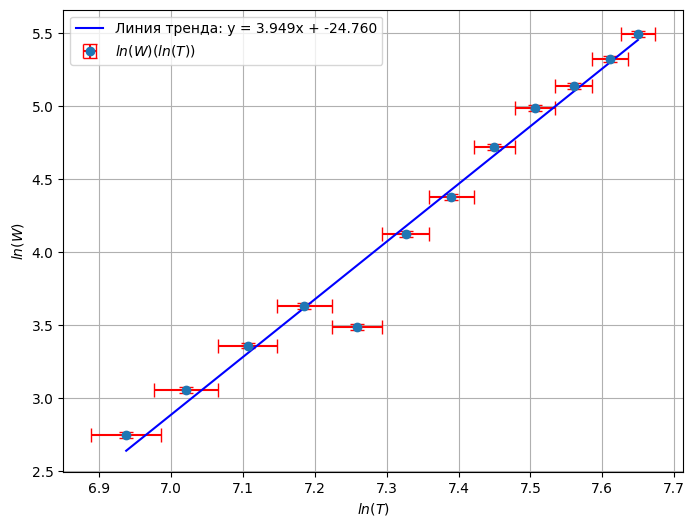

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
data_df = pd.read_csv('data.csv')
mistakes_df = pd.read_csv('mistakes.csv')

# Переименование столбцов для удобства
data_df.columns = ['X', 'Y']
mistakes_df.columns = ['X_err', 'Y_err']

# Выполнение взвешенной линейной регрессии
# Весы рассчитываются как обратные квадраты погрешностей по Y
weights = 1 / (mistakes_df['Y_err'] ** 2)  
slope, intercept = np.polyfit(data_df['X'], data_df['Y'], 1, w=weights)
trendline = slope * data_df['X'] + intercept

# Рассчет неопределенности в наклоне (стандартная ошибка)
N = 13  # Количество точек данных
delta = abs(N * np.sum(weights * data_df['X'] ** 2) - (np.sum(weights * data_df['X'])) ** 2)
slope_uncertainty = np.sqrt(N / delta * np.sum(weights))

# Рассчет ошибки наклона как абсолютного значения неопределенности
slope_mistake = abs(slope_uncertainty)

# Вывод результатов
print(f"Рассчитанный наклон: {slope:.3f}")
print(f"Неопределенность наклона: {slope_uncertainty:.3f}")
print(f"Ошибка наклона: {slope_mistake:.3f}")

# Построение графика с погрешностями и линией тренда
plt.figure(figsize=(8, 6))
plt.errorbar(data_df['X'], data_df['Y'], xerr=mistakes_df['X_err'], yerr=mistakes_df['Y_err'], fmt='o', ecolor='red', capsize=5, label='$ln(W)(ln(T))$')
plt.plot(data_df['X'], trendline, color='blue', label=f'Линия тренда: y = {slope:.3f}x + {intercept:.3f}')

# Настройка осей и легенды
plt.xlabel('$ln(T)$')
plt.ylabel('$ln(W)$')
plt.grid()
plt.legend()

# Сохранение графика и отображение
plt.savefig('plot.jpg', format='jpg')
plt.grid(True)
plt.show()